Missing Percentage:
 Booking_ID       0.000000
Destination      5.346535
Package_Price    3.960396
Customer_Age     2.970297
Rating           4.950495
Review_Text      3.960396
Travel_Date      1.980198
dtype: float64


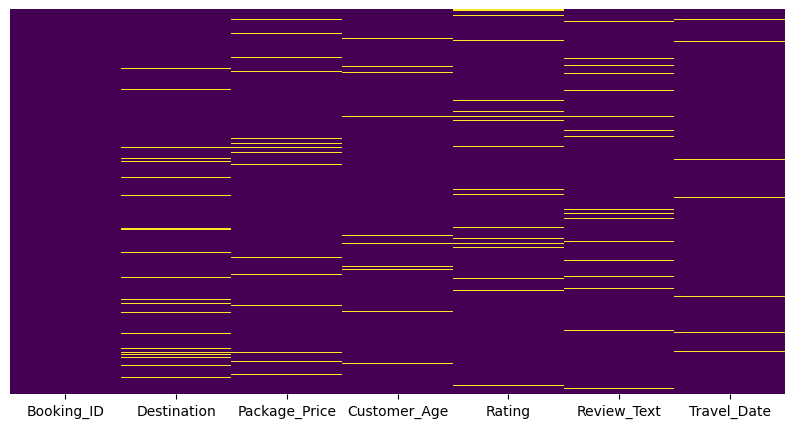

Summary Before Imputation:
        Booking_ID  Package_Price  Customer_Age      Rating
count  505.000000     505.000000    505.000000  505.000000
mean   251.774257    2770.631683     42.910891    3.108119
std    144.804413    1261.749885     15.249707    1.127908
min      1.000000     500.000000     18.000000    1.000000
25%    127.000000    1676.000000     30.000000    2.000000
50%    252.000000    2802.000000     42.000000    3.000000
75%    378.000000    3848.000000     56.000000    4.000000
max    500.000000    4993.000000     69.000000    5.000000


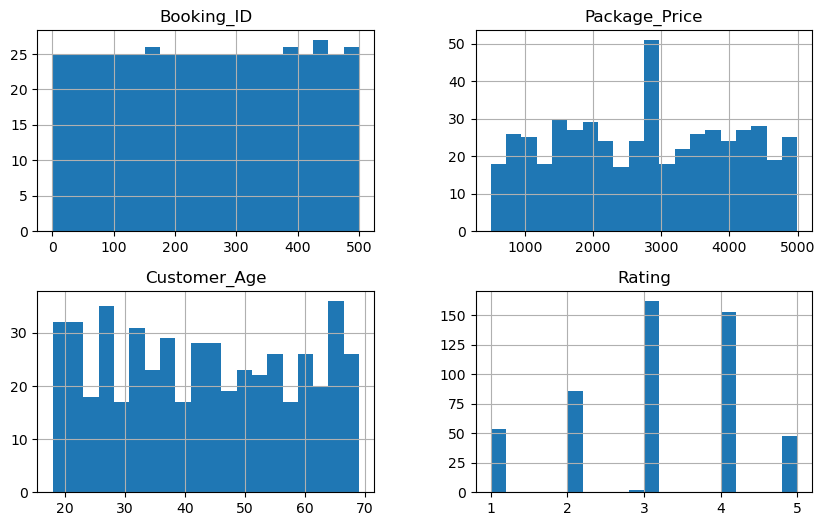

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Day_18_Tours_and_Travels.csv")

missing_percentage = df.isna().mean() * 100
print("Missing Percentage:\n", missing_percentage)

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()

df['Package_Price'].fillna(df['Package_Price'].median(), inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df.fillna(method='ffill', inplace=True)

knn_imputer = KNNImputer(n_neighbors=5)
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])

summary_before = df.describe()
print("Summary Before Imputation:\n", summary_before)

df.hist(figsize=(10, 6), bins=20)
plt.show()

df.to_csv("Cleaned_Day_18_Tours_and_Travels.csv", index=False)


#### Observations 
Findings:
- Missing values detected in numerical and categorical columns.
- Visualized patterns using a heatmap.

Methods Used:
- Median for numerical fields.
- Mode for categorical fields.
- Forward fill for sequential data.
- KNN imputation for complex cases.

Final Observations:
- Imputation improved data consistency.
- No significant distortions in data distribution.